In [5]:
import numpy as np
import pandas as pd
import janitor
import matplotlib.pyplot as plt 

In [8]:
data = pd.read_csv('global disasters.csv')
data.columns

Index(['Dis No', 'Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'AID Contribution ('000 US$)', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damages ('000 US$)', 'Insured Damages, Adjusted ('000 US$)',
       'Total Damages ('000 US$)', 'Total Damages, Adjusted ('000 US$)', 'CPI',
       'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations'],
      dtype='object')

In [9]:
totalaffected = data[["Total Affected", "Year", "Country","Disaster Type"]]
totalaffected.to_csv('totalaffected.csv')


In [7]:
intensity = data[["Total Affected", "Year", "Country","Disaster Type"]] #WHAT I ORIGINALLY SUMMED WITHOUT IMPUTING


intensity_grouped = intensity.groupby(["Country","Year"])
x = intensity_grouped["Total Affected"].sum()

x= x.reset_index()
x = x[(x["Year"]>=1970)&(x["Year"]<=2020)]
dates = {"Year": lambda df: range(1970, 2020 + 1)}
r = x.complete(dates, by="Country", sort=True).fillna({"Total Affected": 0})
#r.to_csv('intensity.csv')
#x["Total Affected"].count()/12125 #73 percent available data

In [34]:
intensity_by_disaster = data[["Total Affected", "Year", "Country", "Disaster Type"]] #what i imputed

#intensity_by_disaster.to_csv('intensitygrouped.csv')

In [36]:
#COMPUTING PERCENTAGES

data = pd.read_csv('population.csv')
countries = data["Country Name"].unique()
years = data.columns[4::]
years = years.astype(int)
minimum = years[0]
maximum = years[-1]
data.drop(data.columns[[0,1,2,3]], axis=1, inplace=True)
data = data.T
data = data.melt().drop('variable',axis=1).rename({'value':'Population'},axis=1)
data
Country = np.repeat(countries,len(years))
data["Country"] = Country 
Year = np.tile(range(minimum, maximum+1,1),len(countries))
data["Year"] = Year
data = data[(data["Year"]>=1970)&(data["Year"]<=2020)] 

disasters = intensity_by_disaster
confounds = data

disasters['Country'].replace('Congo (the Democratic Republic of the)', 'Democratic Republic of the Congo', inplace=True)
disasters['Country'].replace('Congo (the)', 'Republic of the Congo', inplace=True)
disasters['Country'].replace('Korea (the Republic of)', 'South Korea', inplace=True)
disasters['Country'].replace("Korea (the Democratic People's Republic of)", 'North Korea', inplace=True)
disasters['Country'] = disasters['Country'].str.replace(r"\s*\([^)]*\)", "", regex=True)
disasters['Country'].replace('Palestine, State of', 'Palestine', inplace=True)
disasters['Country'].replace("Russian Federation", 'Russia', inplace=True)
disasters['Country'].replace("United States of America", 'United States', inplace=True)
disasters['Country'].replace("United Kingdom of Great Britain and Northern Ireland", 'United Kingdom', inplace=True)
disasters['Country'].replace("Viet Nam", 'Vietnam', inplace=True)
disasters['Country'].replace("Tanzania, United Republic of", 'Tanzania', inplace=True)
disasters['Country'].replace("Yemen Arab Rep", 'Yemen', inplace=True)
disasters['Country'].replace("Yemen P Dem Rep", 'Yemen', inplace=True)
disasters['Country'].replace("Côte d’Ivoire", "Cote d'Ivoire", inplace=True)
disasters['Country'].replace("Taiwan (Province of China)", "Taiwan", inplace=True)
disasters['Country'].replace("Syrian Arab Republic", "Syria", inplace=True)
disasters['Country'].replace("Lao People's Democratic Republic", "Laos", inplace=True)

confounds['Country'].replace('Bahamas, The', 'Bahamas', inplace=True)
confounds['Country'].replace('Congo, Dem. Rep.', 'Democratic Republic of the Congo', inplace=True)
confounds['Country'].replace('Congo, Rep.', 'Republic of the Congo', inplace=True)
confounds['Country'].replace('Czechia', 'Czech Republic', inplace=True)
confounds['Country'].replace('Egypt, Arab Rep.', 'Egypt', inplace=True)
confounds['Country'].replace('Gambia, The', 'Gambia', inplace=True)
confounds['Country'].replace('Iran, Islamic Rep.', 'Iran', inplace=True)
confounds['Country'].replace("Korea, Dem. People's Rep.",'North Korea', inplace=True)
confounds['Country'].replace("Korea, Rep.",'South Korea', inplace=True)
confounds['Country'].replace("Kyrgyz Republic",'Kyrgyzstan', inplace=True)
confounds['Country'].replace("Lao PDR",'Laos', inplace=True)
confounds['Country'].replace("North Macedonia",'Macedonia', inplace=True)
confounds['Country'].replace("Russian Federation",'Russia', inplace=True)
confounds['Country'].replace("Slovak Republic",'Slovakia', inplace=True)
confounds['Country'].replace("St. Kitts and Nevis",'Saint Kitts and Nevis', inplace=True)
confounds['Country'].replace("St. Lucia",'Saint Lucia', inplace=True)
confounds['Country'].replace("Hong Kong SAR, China",'Hong Kong', inplace=True)
confounds['Country'].replace("Turkiye",'Turkey', inplace=True)
confounds['Country'].replace("Venezuela, RB",'Venezuela', inplace=True)
confounds['Country'].replace("West Bank and Gaza",'Palestine', inplace=True)
confounds['Country'].replace("Yemen, Rep.",'Yemen', inplace=True)
confounds['Country'].replace('Syrian Arab Republic','Syria', inplace=True)
confounds['Country'].replace('Micronesia, Fed. Sts.','Micronesia', inplace=True)
confounds['Country'].replace('St. Vincent and the Grenadines','Saint Vincent and the Grenadines', inplace=True)

remove_confounds = ['Africa Eastern and Southern', 'Africa Western and Central','Early-demographic dividend', 'East Asia & Pacific',
           'East Asia & Pacific (IDA & IBRD countries)',
           'East Asia & Pacific (excluding high income)','Euro area', 'Europe & Central Asia',
           'Europe & Central Asia (IDA & IBRD countries)',
           'Europe & Central Asia (excluding high income)', 'European Union','Fragile and conflict affected situations','Heavily indebted poor countries (HIPC)', 'High income',
    'IBRD only', 'IDA & IBRD total',
           'IDA blend', 'IDA only', 'IDA total', 'Late-demographic dividend',
           'Latin America & Caribbean',
           'Latin America & Caribbean (excluding high income)',
           'Latin America & the Caribbean (IDA & IBRD countries)',
           'Least developed countries: UN classification', 'Liechtenstein',
           'Low & middle income', 'Low income', 'Lower middle income','Middle East & North Africa',
           'Middle East & North Africa (IDA & IBRD countries)',
           'Middle East & North Africa (excluding high income)',
           'Middle income','Not classified', 'OECD members',
           'Other small states','British Virgin Islands','Channel Islands', 'Curacao','Gibraltar','Pacific island small states','Post-demographic dividend', 'Pre-demographic dividend',
    'Small states','Faroe Islands', 'South Asia', 'South Asia (IDA & IBRD)', 'Sub-Saharan Africa',
           'Sub-Saharan Africa (IDA & IBRD countries)','San Marino',
           'Sub-Saharan Africa (excluding high income)',"Kosovo","North America",'Macao SAR, China','Sint Maarten (Dutch part)',"Virgin Islands (U.S.)","St. Martin (French part)",'Central Europe and the Baltics','Upper middle income','World', "Arab World", "Caribbean small states", "Central Europe and the Baltics, North America"]

exclude = ['Germany Dem Rep','Germany Fed Rep','Netherlands Antilles','French Guiana',"Anguilla", 'Azores Islands','Canary Is',"Cook Islands",'Czechoslovakia',"Guadeloupe","Macao","Montserrat"
              ,"Niue",'Réunion',"Saint Barthélemy",'Saint Helena, Ascension and Tristan da Cunha','Saint Martin','Serbia Montenegro','Soviet Union',
              'Tokelau', 'Virgin Island', 'Wallis and Futuna', 'Yugoslavia','Sint Maarten']

confounds = confounds.loc[~confounds['Country'].isin(remove_confounds)]
disasters = disasters.loc[~disasters['Country'].isin(exclude)]

new = pd.merge(disasters,confounds, how="outer", left_on=["Country", "Year"],right_on=["Country", "Year"])
new.to_csv("INTENSITY_W_POPULATION.csv")

In [4]:
data1 = data[(data["Year"]>=1970) & (data["Year"]<=2020)]
continents = dict(zip(data1.Country, data1.Continent))

In [5]:
#making the country, year, frequency dataframe
countrygrouped = data1.groupby("Country",sort=False,dropna=False)
yearcountry = countrygrouped["Year"].value_counts()
data2 = pd.DataFrame(yearcountry)
data2 = data2.rename(columns={"Year": "Frequency"})
data2 = data2.reset_index()
data2 = data2.sort_values(by = ["Country","Year"])

countries = data2["Country"].unique()

# create dictionary for new dates
dates = {"Year": lambda df: range(1970, 2020 + 1)}

data2 = data2.complete(dates, by="Country", sort=True).fillna({"Frequency": 0})
data2["Continent"]=data2.Country.replace(continents)

In [6]:
data2.to_csv('frequency')

<AxesSubplot:title={'center':'Natural Disasters by Year'}, xlabel='Year', ylabel='Number of Natural Disasters'>

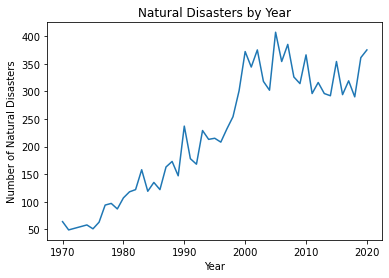

In [8]:
disasters = pd.read_csv('frequency.csv')
grouped = disasters.groupby("Year")
byyear = grouped["Frequency"].sum()
plt.xlabel("Year")
plt.ylabel("Number of Natural Disasters")
plt.title("Natural Disasters by Year")
byyear.plot.line()